In [13]:
%matplotlib inline

In [7]:
%run -i ../../../../xs_proc/proc_data_ana.py

In [8]:
pwd

'/hz/data/id13/inhouse12/jiliang/code_v4/example/ihsc1654/ihsc1654/jupyter_analysis'

In [40]:
#azi is angle coordinate correlate to chi
#ct is beam intensity that could be used for normalization
#qphi is 4D matrix that exhibit the scan of transformed 2d data
#path_list is the list contain measured h5 data path
#path_idx is the path idx of path_list for each scan pttn
#pttn_idx is the pattern idx of measured h5 data
fn = '../hdf_file/hum_sample_hum_sample_fiber2_l5_p01_1_proc.h5'
azi,ct,qphi,q,path_list,path_idx,pttn_idx = load_proc(fn)

In [41]:
qphi_norm = ct_normalization(qphi,ct)

In [42]:
qphi_norm_new = np.copy(qphi_norm)
for _ in range(qphi_norm.shape[0]):
    for __ in range(qphi_norm.shape[1]):
        qphi_norm_new[_,__] -= (qphi_norm[_,6]+qphi_norm[_,22])/2
    
qphi_norm = np.copy(qphi_norm_new)
del qphi_norm_new

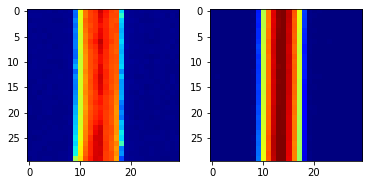

In [64]:
int_map1 = sum_roi_2dmap(qphi_norm,azi,q,qmin=0.02,qmax=0.05)
int_map2 = sum_roi_2dmap(qphi_norm,azi,q,qmin=1.3,qmax=1.5)
int_map2[:,-1] = 0
plt.figure()
#this is intensity map of small angle region
plt.subplot(121)
plt.imshow(int_map1,vmin=150,vmax=450,cmap='jet')
#this is intensity of q 18-19 nm-1 region
plt.subplot(122)
plt.imshow(int_map2,vmin=0,vmax=5,cmap='jet')

In [6]:
#original h5 data path

#with h5py.File(fn,'r') as f:
#    print(np.array(f.attrs['origin_h5_path']))

In [16]:
det = load_proc_dataset(fn,'detector_distance')
print('detector distance is {}'.format(det))

detector distance is -640.0


In [8]:
# map of integral intensity of each pattern
#int_map = sum_roi_2dmap(qphi,azi,q)
#plt.subplots()
#plt.imshow(np.log(int_map),vmin=0,vmax=5,cmap='Greys')#,aspect=5
# diffraction pattern is weak, intensity map of sum the whole q range for waxs is noise,
# these noise could be unmasked bad pixel, artifacts

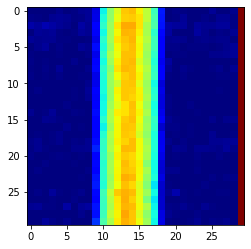

In [18]:
# you could sum intensity for certain q range such as q from 0 to 0.1
int_map = sum_roi_2dmap(qphi_norm,azi,q,qmin=1.4,qmax=1.44,amin=80,amax=100)
plt.subplots()
plt.imshow(int_map,vmin=0,vmax=5,cmap='jet')
#the small data has better contrast of intensity map

../../../../xs_proc/proc_data_ana.py:110: RuntimeWarning: Mean of empty slice
  return a[aid1:aid2],np.nanmean(qphi[aid1:aid2,qid1:qid2],axis=1)


Text(0.5, 1.0, '$reflection\\,\\,(0\\,\\,1\\,\\,3)')

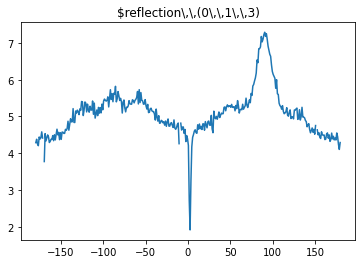

In [34]:
# if you want to see the azimuth distribution for certain q range, lets say from 1.4 to 1.6
# !!! please change the "vs_axis='a'"
mask = (qphi[5,1]<0.001)
a1,Ia = sum_roi(qphi[5,15],azi,q,qmin=2.35,qmax=2.45,mask=mask,vs_axis='a')
plt.subplots()
plt.plot(a1,Ia)
plt.title(r'$reflection\,\,(0\,\,1\,\,3)')

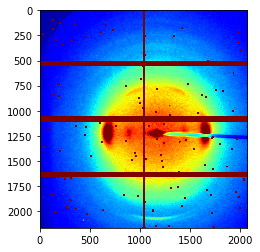

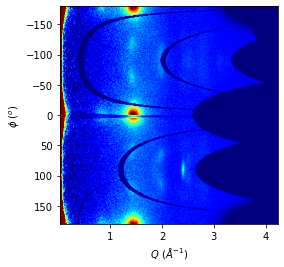

In [21]:
# if you want to see the original pattern of scan point (250,5)
#plt.subplots()
#pttn_mask = np.load('msk_file/ndet_m640.npz')['mask']
plot_pttn(path_list[path_idx[5,15]],
          pttn_idx[5,15],log=False,
          vmin=0,vmax=15,cmap='jet')
#plt.subplots()
plot_qphi(qphi_norm[5,15],q=q,a=azi,vmin=0,vmax=15,log=False,cmap='jet')

In [15]:
from scipy.signal import medfilt2d
def medfilt_pttn(data,kernel_size=3):
    # medfilt2d could directly ignore np.nan value
    # larger kernel size will leads to more smoother diffuse data
    smooth_data    = medfilt2d(data,kernel_size)
    high_frequence = data-smooth_data
    return smooth_data,high_frequence
def qphi_high_freq_separation(qphi,kernel_size):
    diffuse = np.copy(qphi)*0
    mineral = np.copy(qphi)*0
    for i in range(qphi.shape[0]):
        for j in range(qphi.shape[1]):
            (diffuse[i,j],mineral[i,j]) = medfilt_pttn(qphi[i,j],kernel_size)
    return diffuse,mineral


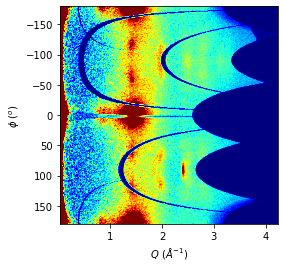

In [38]:
qphi_norm[:,:,mask] = 0#np.nan
qphi_norm[qphi_norm<0] = 1e-6
int_map = sum_roi_2dmap(qphi_norm,azi,q,qmin=0,qmax=0.1)
x=15#162#154
y=2#132#130
plot_qphi(qphi_norm[y,x],q=q,a=azi,vmin=0,vmax=5,log=False,cmap='jet')
#plt.imshow(qphi_norm[y,x])

mask = (qphi_norm[5,250]<0.001)
qphi_norm[:,:,mask] = np.nan
plt.subplots()
plt.imshow(np.log(int_map),vmin=1,vmax=5,cmap='Greys')
plt.scatter(5,250,s=50,marker='+',color='b')
plt.scatter(250,5,s=50,marker='+',color='g')
plt.scatter(164,132,s=50,marker='+',color='r')
plt.scatter(211,154,s=50,marker='+',color='m')

plt.subplots()
q1,I1 = sum_roi(qphi_norm[5,250],azi,q,amin=80,amax=100,mask=mask)
plt.plot(q,I1,color='b')
q1,I1 = sum_roi(qphi_norm[250,5],azi,q,amin=80,amax=100,mask=mask)
plt.plot(q1,I1,color='g')
#I1 = sum_roi(qphi[130,154],azi,q,amin=80,amax=100,mask=mask)
#plt.plot(q,I1)
q1,I1 = sum_roi(qphi_norm[132,162],azi,q,amin=80,amax=100,mask=mask)
plt.plot(q1,I1,color='r')
q1,I1 = sum_roi(qphi_norm[154,211],azi,q,amin=-20,amax=20,mask=mask)
plt.semilogy(q1,I1,color='m')
#plt.ylim(0,30)
plt.vlines(0.15,1,1000)
plt.vlines(0.32,1,1000)
plt.vlines(1.38,1,1000)
plt.xlabel(r'$Q\,\,(\AA^{-1})$',fontsize=16)
plt.ylabel(r'$I\,\,(a.u.)$',fontsize=16)

In [25]:
#plt.subplots()
#plt.imshow(path_idx,cmap='jet')

In [26]:
# here is no obvious background pattern for using
#def qphi_bkgd_sub(bkgd,qphi):
#    data = np.copy(qphi)
#    for i in range(len(qphi.shape[0])):
#        for j in range(len(qphi.shape[1])):
#            data[i,j] = data[i,j] - bkgd
#    return data

In [36]:
oris,wids = ori_determ2d(qphi_norm,azi,q,0.05,0.15)
oriw,widw = ori_determ2d(qphi_norm,azi,q,1.4,1.44)

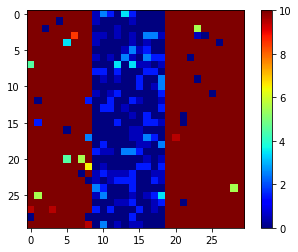

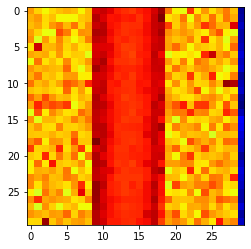

In [37]:
# the plot is the orientation plot of Q at 18.6 nm-1
# the plot above is orientation plot, blue indicate horizontal orientated
# the plot blow is significance of orientation, hotter indicates better oriented of chitin fiber
oriss = np.copy(oris)
oriss[oris<10] += 180
oriww = np.copy(oriw)
oriww[oriw<10] += 180

oriss[oriss>90] = 180 - oriss[oriss>90]
oriww[oriww>90] = 180 - oriww[oriww>90]
plt.subplots()
#plt.subplot(121)
#plt.imshow(oriss,vmin=0,vmax=90,cmap='jet')
#plt.subplot(122)
plt.imshow(oriww,vmin=0,vmax=10,cmap='jet')
plt.colorbar()
plt.subplots()
#plt.subplot(121)
#plt.imshow(np.log(1/wids),cmap='jet')
#plt.subplot(122)
plt.imshow(np.log(1/widw),cmap='jet')

../../../../xs_proc/proc_data_ana.py:31: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  else:


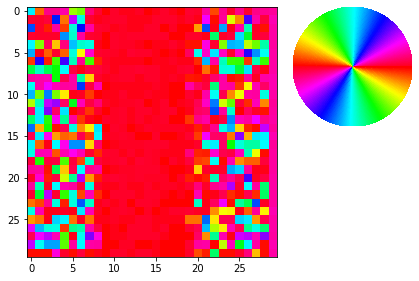

In [29]:
# here is degree for vals is -90 to 90, orientation had been adjusted within this range
def circle_sine_ramp(r_max=20, r_min=0, amp=np.pi/5, cycles=50,
                     power=2, nr=50, ntheta=1025):
    r, t = np.mgrid[r_min:r_max:nr*1j, 0:2*np.pi:ntheta*1j]
    r_norm = (r - r_min)/(r_max - r_min)
    vals = amp * r_norm**power * np.sin(cycles*t) + t
    vals = np.mod(vals, 2*np.pi) - np.pi
    vals[vals<0] += np.pi
    vals -= np.pi/2
    return t, r, vals

t, r, vals = circle_sine_ramp(cycles=0)
#plt.figure()
#plt.subplot(121)
#plt.pcolor(r*np.cos(t)+20,r*np.sin(t)+20,np.degrees(vals),cmap='hsv_r')
#plt.colorbar()
#plt.axis('image')
#plt.axis('off')

v = np.copy(oris)
v[v<0] += 180
v -= 90
#plt.subplot(122)
#plt.imshow(v,vmin=-90,vmax=90,cmap='hsv_r')
#plt.colorbar()

fig = plt.subplots()
ax1 = plt.subplot2grid((2,3),(0,0),colspan=2,rowspan=2)
ax2 = plt.subplot2grid((2,3),(0,2),colspan=1,rowspan=1)
ax1.imshow(v,vmin=-90,vmax=90,cmap='hsv_r')
ax2.pcolor(r*np.cos(t)+20,r*np.sin(t)+20,np.degrees(vals),cmap='hsv_r')
ax2.axis('image')
ax2.axis('off')
plt.tight_layout()

../../../../xs_proc/proc_data_ana.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import fabio


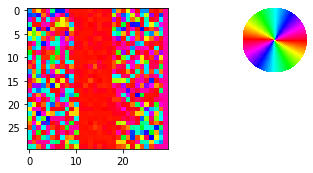

In [48]:
plt.close('all')
fig = plt.figure()

ax1 = plt.subplot2grid((3,3), (0, 2))
ax2 = plt.subplot2grid((3,3), (0, 0),colspan=2,rowspan=2)
ax1.pcolor(r*np.cos(t)+20,r*np.sin(t)+20,np.degrees(vals),cmap='hsv_r')
ax1.axis('image')
ax1.axis('off')
ax2.imshow(v,vmin=-90,vmax=90,cmap='hsv_r')

(0.0, 15.0)

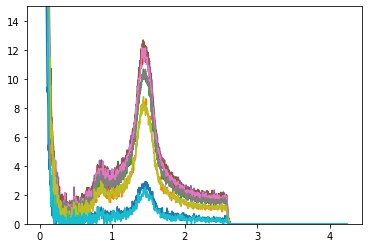

In [66]:
I1 = np.zeros((10,1200))
row = 12
for _ in range(9,19):
    q1,I1[_-9,:] = sum_roi(qphi_norm[row,_],q=q,a=azi,amin=-10,amax=10,vs_axis='q')
plt.subplots()
plt.plot(q1,I1.T)
plt.ylim(0,15)

In [48]:
def cylinder_form_factor(qr,r,qz=0,height=1,density=1):
    V = 2*np.pi*r**2*height
    F = 2*j0(qz*height/2)*j1(qr*r)/qr/r + 1j*0
    F *= density*V
    return np.abs(F)

def center_center_interference(q,d):
    return np.abs(2*(1+j0(q*d)))

def norm_func(x):
    #guassian function with mean = 0 and sigma =1
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

def poly_diversity(func,q,r,dr,dsigma=1,nsigma=3):
    # for poly_diversity, pdf using the norm_func with sigma = 1
    # sample points depends on both nsigma (largest sigma reached) and 
    # the sampling span within each sigma region
    for i in range(int(nsigma/dsigma)*2+1):
        p = i - int(nsigma/dsigma)
        if i == 0:
            I = func(q,r+dr*dsigma*p)*norm_func(p*dsigma)
        else:
            I += func(q,r+dr*dsigma*p)*norm_func(p*dsigma)
    return I

(0.0, 1.5)

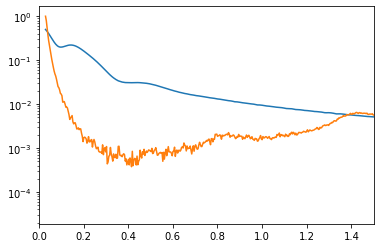

In [58]:
from scipy.special import j0,j1
r = 10
d = 40
Ifit = poly_diversity(cylinder_form_factor,q,r,2,0.2)*poly_diversity(center_center_interference,q,d,10,0.2)
plt.subplots()
plt.semilogy(
         q,Ifit/np.nanmax(Ifit)/2,
         q1,I1[5,:]/np.nanmax(I1[5,:])
            )
plt.xlim(0,1.5)

In [32]:
pttn_mask = np.load('msk_file/ndet_m640.npz')['mask']
def plot_spot(x,y,vmin=0,vmax=30,log=False,
              qphi_plot=True,pttn_plot=False,line_plot=True,
              qmin=1.83,qmax=1.89,amin=None,amax=None,mask=pttn_mask):
    if pttn_plot:
        plt.subplots()
        plot_pttn(path_list[path_idx[y,x]],
                  pttn_idx[y,x],log=log,
                  vmin=vmin,vmax=vmax,mask=pttn_mask,cmap='jet')
    if qphi_plot:
        plt.subplots()
        plot_qphi(qphi[y,x],q=q,a=azi,vmin=vmin,
                  vmax=vmax,log=log,cmap='jet')
        if isinstance(amin,type(None)): amin = np.min(azi)
        if isinstance(amax,type(None)): amax = np.max(azi)
        plt.vlines(qmin,amin,amax,linewidth=1.5)
        plt.vlines(qmax,amin,amax,linewidth=1.5)
    if line_plot:
        a,Ia = sum_roi(qphi[y,x],azi,q,qmin=qmin,qmax=qmax,mask=mask,vs_axis='a')
        plt.subplots()
        plt.plot(a,Ia)
        plt.title(r'$reflection\,\,(0\,\,1\,\,3)')

In [25]:
def asymetry_compare(x,y,qmin=1.83,qmax=1.89):
    # compare the intensity difference of maximum at (-180,0) and (0,180)
    a1,Ia1 = sum_roi(qphi[y,x],azi,q,qmin=1.8,qmax=1.9,mask=mask,
                 amin=-180,amax=0,vs_axis='a')
    i1 = np.nanmax(Ia1)
    a2,Ia2 = sum_roi(qphi[y,x],azi,q,qmin=1.8,qmax=1.9,mask=mask,
                 amin=0,amax=180,vs_axis='a')
    i2 = np.nanmax(Ia2)
    if i1 >= i2:
        sign = 1.
    else:
        sign = -1.
    
    return sign*(np.max([i1,i2])/np.min([i1,i2])-1)

def asym_mat(qphi,qmin,qmax):
    mat = np.zeros(qphi.shape[:2])
    for y in range(qphi.shape[0]):
        for x in range(qphi.shape[1]):
            mat[y,x] = asymetry_compare(x,y,qmin,qmax)
    return mat

../../../../xs_proc/proc_data_ana.py:110: RuntimeWarning: Mean of empty slice
  return a[aid1:aid2],np.nanmean(qphi[aid1:aid2,qid1:qid2],axis=1)


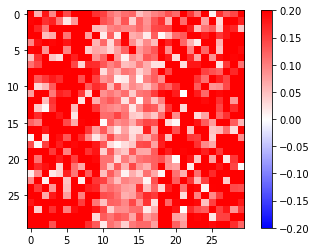

In [35]:
# this is orientation of 013 reflection normal to the scan plane
# 
asm = asym_mat(qphi,2.35,2.45)
plt.imshow(np.abs(asm),vmin=-0.2,vmax=0.2,cmap='bwr')
plt.colorbar()